# 4.  문자열의 아름다움
#### lv.5
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/68938)

In [2]:
buaety_dict = {}

def get_buaety(s):
    buaety = 0
    # buaety_dict에 저장되어 있다면 바로 return
    if buaety_dict.get(s) != None: return buaety_dict[s]
    
    for i in range(len(s)):
        # 만약 현재까지의 최대값보다 남은 문자열의 길이가 작다면 break
        if len(s) - i <= buaety: break
        # j는 마지막부터 i + buaety까지
        for j in range(len(s)-1, i+buaety, -1):
            if buaety_dict.get(s[i:j+1]) != None:
                # 이미 buaety_dict에 저장되어 있다면 바로 return
                buaety = buaety_dict[s[i:j+1]]
                break
            else:
                # 아름다움 판별
                if s[i] != s[j]:
                    buaety = j-i
                    buaety_dict[s[i:j+1]] = buaety
                    break
    # buaety_dict에 저장
    buaety_dict[s] = buaety
    
    return buaety

def solution(s):
    answer = 0
    # s의 모든 부분 문자열에 대해 아름다움을 구함
    for i in range(len(s)-1):
        for j in range(i+1, len(s)):
            answer += get_buaety(s[i:j+1])
    return answer

In [3]:
s = 'baby'
solution(s)

9

In [4]:
s = 'oo'
solution(s)

0

## 실패
- 완전탐색을 할 경우 너무 오래걸림.
    - 계산을 줄일 방법을 고민해보아야함.

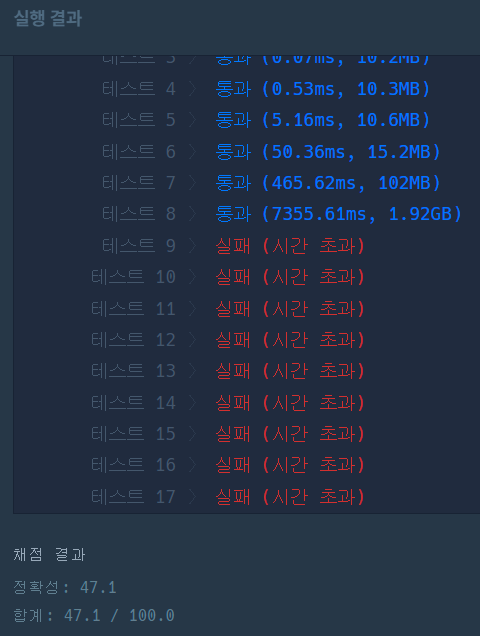

In [152]:
# 아음다움을 저장할 dict
# key : start, end
# value : buaety
buaety_dict = None
s = ''
# 재귀 형식으로 전체 아름다움을 구하는 함수
def get_buaety(start, end):
    global buaety_dict, s
    # print(start, end)
    # 문자열의 길이가 1이라면 아름다움은 0
    if start == end: return
    # buaety_dict에 저장되어 있다면 바로 return 0
    # 이미 구했던 아름다움은 다시 더해줄 필요가 없음
    if buaety_dict.get((start, end)) != None: return

    # 좌우 같은 문자열의 길이를 찾음
    l_same = 0
    r_same = 0
    # 더 짧은쪽의 길이를 저장
    min_same = 0
    # 좌우 알파벳
    l_alpha = s[start]
    r_alpha = s[end]
    # 좌우가 같은 문자열인 경우
    if l_alpha == r_alpha:
        l_stop, r_stop = False, False
        # 좌우 같은 문자열의 길이를 찾음
        for i in range(start, end+1):
            j = end - start - i # i와 대칭되는 인덱스
            # i와 j가 같은 인덱스를 가리키면 break
            if j <= i: break
            # r, l이 모두 더이상 같은 문자열을 가리키지 않는다면 break
            if l_stop and r_stop: break
            # 좌측
            if s[i] == l_alpha and not l_stop: l_same += 1
            else: l_stop = True
            # 우측
            if s[j] == r_alpha and not r_stop: r_same += 1
            else: r_stop = True
        # 좌우 같은 문자열의 길이가 전체 문자열의 길이보다 크다면
        if l_same + r_same >= end - start + 1:
            # 아름다움은 0
            buaety_dict[(start, end)] = 0
            return 0
        # 짧은 쪽의 방향과 길이를 저장
        min_is_right = False
        if l_same > r_same: min_is_right = True
        min_same = min(l_same, r_same)
        # 아름다움
        buaety = end - start - min_same
        # 짧은 쪽은 줄어들어도 아름다움은 그대로 -> 딕셔너리에 저장
        if min_is_right:
            for end_ in range(end-min_same+1, end+1):
                buaety_dict[(start, end_)] = buaety
        else:
            for start_ in range(start, start+min_same+1):
                buaety_dict[(start_, end)] = buaety
    
    buaety = end - start - min_same
    buaety_dict[(start, end)] = buaety
    
    # 부분 문자열들의 아름다움을 구함
    for i in range(start+1, end):
        get_buaety(start, i)
        get_buaety(i+1, end)

def solution(s_):
    global s, buaety_dict
    s = s_
    buaety_dict = {}
    # 시작점과 끝점을 설정
    start = 0
    end = len(s) -1
    get_buaety(start, end)
    buatys = buaety_dict.values()
    buaety = sum(buatys)
    return  buaety

In [153]:
# aaasdfsdgaaaaaa -> 양쪽 같은 알파벳의 길이들을 얻기
# l -> 3, r -> 6
# 짧은쪽은 줄어들어도 아름다움은 변하지 않음
# 0~end, 1~end, 2~end, 3~end 까지의 아름다움은 같음

In [154]:
s_ = 'baby'
solution(s_)

7

In [155]:
buaety_dict

{(0, 3): 3, (0, 1): 1, (2, 3): 1, (0, 2): 1, (1, 2): 1}

In [97]:
# buaety_dict 정렬
buaety_dict = sorted(buaety_dict.items(), key=lambda x: x[0])

In [98]:
buaety_dict

[((0, 1), 1), ((0, 2), 1), ((0, 3), 3), ((1, 2), 1), ((1, 3), 2), ((2, 3), 1)]

In [108]:
buaety_dict = {}

def get_buaety(start, end):
    buaety = 0
    # buaety_dict에 저장되어 있다면 바로 return
    if buaety_dict.get((start, end)) != None: return buaety_dict[(start, end)]
    
    for i in range(end-start+1):
        # 만약 현재까지의 최대값보다 남은 문자열의 길이가 작다면 break
        if end-start+1 - i <= buaety: break
        # j는 마지막부터 i + buaety까지
        for j in range(end-start+1-1, i+buaety, -1):
            if buaety_dict.get((i,j)) != None:
                # 이미 buaety_dict에 저장되어 있다면 바로 return
                buaety = buaety_dict[(i,j)]
                break
            else:
                # 아름다움 판별
                if s[i] != s[j]:
                    buaety = j-i
                    buaety_dict[(i,j)] = buaety
                    break
    # buaety_dict에 저장
    buaety_dict[(start, end)] = buaety
    
    return buaety

def solution(s):
    answer = 0
    # s의 모든 부분 문자열에 대해 아름다움을 구함
    for i in range(len(s)-1):
        for j in range(i+1, len(s)):
            answer += get_buaety(i,j)
    return answer

In [109]:
s = 'baby'
solution(s)

8

In [110]:
buaety_dict

{(0, 1): 1, (0, 2): 1, (0, 3): 3, (1, 2): 1, (1, 3): 1, (2, 3): 1}

In [177]:
import re
# 아음다움을 저장할 dict
# key : start, end
# value : buaety
buaety_dict = None
s = ''
# 좌우의 같은 문자열의 길이를 구하는 함수
def get_same_len(start, end):
    global s
    l_s = s[start]
    r_s = s[end]
    # 좌우가 같은 문자열인 경우
    if l_s == r_s:
        l_p = re.compile(f'^{l_s}+')
        r_p = re.compile(f'{r_s}+$')
        l_same = len(l_p.findall(s[start:end+1])[0])
        r_same = len(r_p.findall(s[start:end+1])[0])
        return l_same, r_same
    return 0, 0

# 재귀 형식으로 전체 아름다움을 구하는 함수
def get_buaety(start, end):
    global buaety_dict, s
    # print(start, end)
    # 문자열의 길이가 1이라면 아름다움은 0
    if start == end: return
    # buaety_dict에 저장되어 있다면 바로 return 0
    # 이미 구했던 아름다움은 다시 더해줄 필요가 없음
    if buaety_dict.get((start, end)) != None: return
    
    l_same, r_same = get_same_len(start, end)
    min_same = min(l_same, r_same)
    # 만약 전체 문자열이 같은 문자열이라면
    if l_same == end - start + 1:
        # 아름다움은 0
        buaety_dict[(start, end)] = 0
        return 0
    
    buaety = end - start - min_same
    buaety_dict[(start, end)] = buaety
    
    # 부분 문자열들의 아름다움을 구함
    for i in range(start+1, end):
        get_buaety(start, i)
        get_buaety(i, end)

def solution(s_):
    global s, buaety_dict
    s = s_
    buaety_dict = {}
    # 시작점과 끝점을 설정
    start = 0
    end = len(s) -1
    get_buaety(start, end)
    buatys = buaety_dict.values()
    buaety = sum(buatys)
    return  buaety

In [180]:
s = 'aaabaaa'
solution(s)

34

In [181]:
buaety_dict

{(0, 6): 3,
 (0, 1): 0,
 (1, 6): 3,
 (1, 2): 0,
 (2, 6): 3,
 (2, 3): 1,
 (3, 6): 3,
 (3, 4): 1,
 (4, 6): 0,
 (3, 5): 2,
 (4, 5): 0,
 (5, 6): 0,
 (2, 4): 1,
 (2, 5): 2,
 (1, 3): 2,
 (1, 4): 2,
 (1, 5): 2,
 (0, 2): 0,
 (0, 3): 3,
 (0, 4): 3,
 (0, 5): 3}